<a href="https://colab.research.google.com/github/SaifAlmaliki/Bert-NLP/blob/main/Sentiment%20Analysis%20-%20BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ktrain

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

**Downloading IMDB dataset**

In [ ]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git


In [ ]:
# Loading the train dataset

data_train = pd.read_excel('IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype = str)

In [ ]:
#loading the test dataset

data_test = pd.read_excel('IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype = str)

In [ ]:
#dimension of the dataset

print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

Size of train dataset:  (25000, 2)
Size of test dataset:  (25000, 2)


In [ ]:
#printing last 5 rows of train dataset

data_train.tail()

,Reviews,Sentiment
24995,Everyone plays their part pretty well in this ...,pos
24996,It happened with Assault on Prescient 13 in 20...,neg
24997,My God. This movie was awful. I can't complain...,neg
24998,"When I first popped in Happy Birthday to Me, I...",neg
24999,"So why does this show suck? Unfortunately, tha...",neg


In [ ]:
#printing head rows of test dataset

data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


**Splitting data into Train and Test:**

In [ ]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)


(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


**Observation:**

You can able to see that it is detecting language as an English.


Also, this is not a multilabel classification

In [ ]:
# name = "bert" means, here we are using BERT model.

model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
# Here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500

learner = ktrain.get_learner(model=model, 
                             train_data=(X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size = 6)

**Find out best learning rate?**

it may take days or many days to find out.




simulating training for different learning rates... this may take a few moments...
Epoch 1/5
4167/4167 [==============================] - 4256s 1s/step - loss: 0.4127 - accuracy: 0.8055
Epoch 2/5
4167/4167 [==============================] - 4255s 1s/step - loss: 0.3016 - accuracy: 0.8657
Epoch 3/5
4167/4167 [==============================] - 4216s 1s/step - loss: 0.8177 - accuracy: 0.4972
Epoch 4/5
4167/4167 [==============================] - 4218s 1s/step - loss: 1.1474 - accuracy: 0.5016


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


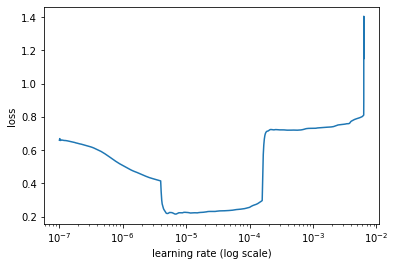

In [ ]:
learner.lr_find(max_epochs=5)
learner.lr_plot()

In [ ]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 5)

predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/My Drive/bert')



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - 5383s 1s/step - loss: 0.2487 - accuracy: 0.8974 - val_loss: 0.0992 - val_accuracy: 0.9692


**Lets Test our Model**

In [23]:
#sample dataset to test on

data = ['this movie was horrible, the plot was really boring. acting was okay',
        'the film is really sucked. there is not plot and acting was bad',
        'what a beautiful movie. great plot. acting was good. will see it again']

In [26]:
# return_proba = True ==> means it will give the prediction probabilty for each class
predictor.predict(data)
# predictor.predict(data, return_proba=True)

['neg', 'neg', 'pos']

In [27]:
# We can Add parameter (return_proba = True) ==> means it will give the prediction probabilty for each class

predictor.predict(data, return_proba=True)

array([[0.9963238 , 0.00367619],
       [0.9949956 , 0.00500443],
       [0.00383797, 0.99616206]], dtype=float32)